# Exploratory Data Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
df = pd.read_csv("data/KSI.csv")
df.columns = df.columns.str.strip()  # remove whitespace

# Preview
print("Shape:", df.shape)
df.head()

Shape: (18957, 54)


,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3389067,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
1,2,3389068,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
2,3,3389069,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
3,4,3389070,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
4,5,3389071,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06


In [42]:
import geopandas as gpd

ksi_gdf = gpd.read_file("data/KSI.geojson")  # or .shp

In [43]:
# Step 2: Basic Info and Nulls
df.info()

# Null values per column
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           0 non-null      int64         
 1   INDEX              0 non-null      int64         
 2   ACCNUM             0 non-null      float64       
 3   DATE               0 non-null      object        
 4   TIME               0 non-null      object        
 5   STREET1            0 non-null      object        
 6   STREET2            0 non-null      object        
 7   OFFSET             0 non-null      object        
 8   ROAD_CLASS         0 non-null      object        
 9   DISTRICT           0 non-null      object        
 10  LATITUDE           0 non-null      float64       
 11  LONGITUDE          0 non-null      float64       
 12  ACCLOC             0 non-null      object        
 13  TRAFFCTL           0 non-null      object        
 14  VISIBILITY         0 non-nu

OBJECTID             0
INDEX                0
CYCACT               0
CYCCOND              0
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER            0
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
DIVISION             0
x                    0
y                    0
DATETIME             0
hour                 0
weekday              0
month                0
year                 0
CYCLISTYPE           0
PEDCOND              0
PEDACT               0
VISIBILITY           0
ACCNUM               0
DATE                 0
TIME                 0
STREET1              0
STREET2              0
OFFSET               0
ROAD_CLASS           0
DISTRICT             0
LATITUDE             0
LONGITUDE            0
ACCLOC     

In [44]:
print(df['DATE'].head(10))

Series([], Name: DATE, dtype: object)


In [45]:
df['DATE'].values[:5]

array([], dtype=object)

In [46]:
# Step 3: Fix datetime parsing from full datetime string in DATE column
df['DATETIME'] = pd.to_datetime(df['DATE'], errors='coerce')

# # Drop rows where datetime parsing failed
# df = df.dropna(subset=['DATETIME'])

# Extract time-based features
df['hour'] = df['DATETIME'].dt.hour
df['weekday'] = df['DATETIME'].dt.dayofweek
df['month'] = df['DATETIME'].dt.month
df['year'] = df['DATETIME'].dt.year
df['weekday_name'] = df['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

# Preview
df[['DATE', 'DATETIME', 'hour', 'weekday_name', 'month', 'year']].head()

,DATE,DATETIME,hour,weekday_name,month,year


In [47]:
df['DATE'].sample(5).tolist()

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
df['DATE'].sample(10).tolist()

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
print(df['DATETIME'].isna().sum())
print(df[['DATE', 'TIME', 'DATETIME']].sample(5))

0


ValueError: a must be greater than 0 unless no samples are taken

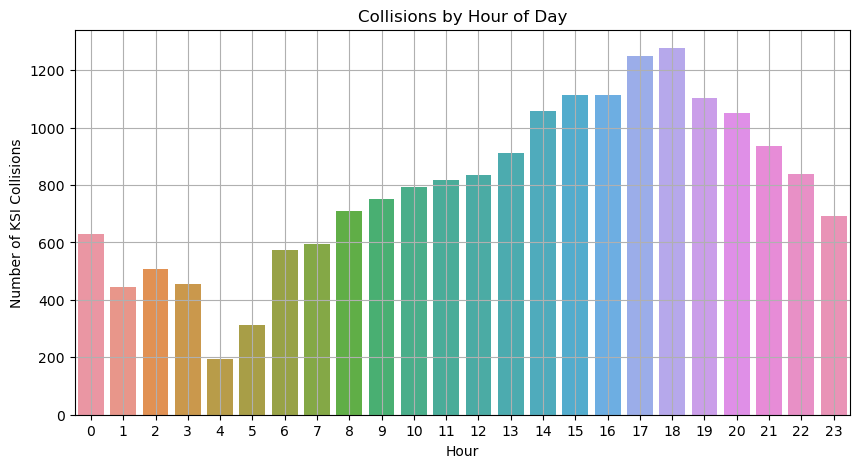

In [ ]:
# Step 4: Plot Collisions by Time of Day
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title("Collisions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of KSI Collisions")
plt.grid(True)
plt.show()